In [1]:
import sqlite3
import csv
import pandas as pd

In [2]:
db = sqlite3.connect("DT_CapstonProject")

In [3]:
cursor=db.cursor()

In [4]:
cursor.execute("""
        CREATE TABLE crimes_against_women (
        State_UT TEXT,
        DISTRICT TEXT,
        Year INT,
        Rape INT,
        Kidnapping_and_Abduction INT,
        Dowry_Deaths INT,
        Assault_on_women_with_intent_to_outrage_her_modesty INT,
        Insult_to_modesty_of_Women INT,
        Cruelty_by_Husband_or_his_Relatives INT,
        Importation_of_Girls INT
    )
""")
db.commit()

### Table created with Name 'crimes_against_women_india' which making connection with database DT_CapstonProject. Now will move towards importing data from CSV file.

## **3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table.**

In [6]:
# building function to import data from above mentioned file

with open('/content/42_District_wise_crimes_committed_against_women_2001_2012.csv','r') as file:
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crimes_against_women VALUES(?,?,?,?,?,?,?,?,?,?)",row.split(","))
        db.commit()
        no_records += 1

#### **In the dataset, a 'TOTAL' row is present for each STATE/UT and DISTRICT. This row aggregates values across all other variables, potentially influencing query outcomes due to its cumulative nature. To ensure simplicity and accuracy in analysis, it is advisable to remove rows containing 'TOTAL' entries.**


In [7]:
# Deleting TOTAL row
cursor.execute('''DELETE FROM crimes_against_women WHERE District LIKE '%TOTAL%';''')

In [16]:
db.commit()

### **3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, district, and year.**

In [8]:
Query_3_2=cursor.execute('''SELECT
                      state_UT, DISTRICT ,Year ,MAX(Rape), MAX(Kidnapping_and_Abduction) FROM crimes_against_women
                      WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL'
                      GROUP BY Year
                      ORDER BY Kidnapping_and_Abduction DESC''')


for row in Query_3_2:
    print(row)

('"STATE/UT"', '"DISTRICT"', '"Year"', '"Rape"', '"Kidnapping and Abduction"')
('"WEST BENGAL"', '"MURSHIDABAD"', 2011, 433, 492)
('"WEST BENGAL"', '"MURSHIDABAD"', 2012, 257, 464)
('"WEST BENGAL"', '"MURSHIDABAD"', 2010, 526, 441)
('"DELHI"', '"NORTH-WEST"', 2005, 236, 349)
('"WEST BENGAL"', '"MURSHIDABAD"', 2009, 568, 342)
('"UTTAR PRADESH"', '"LUCKNOW"', 2008, 334, 331)
('"DELHI"', '"NORTH WEST"', 2001, 145, 298)
('"DELHI"', '"NORTH-WEST"', 2006, 224, 287)
('"DELHI"', '"NORTH WEST"', 2002, 159, 259)
('"DELHI"', '"OUTER"', 2007, 369, 237)
('"ASSAM"', '"GUWAHATI CITY"', 2004, 197, 228)
('"DELHI"', '"NORTH WEST"', 2003, 137, 191)


- The district **MURSHIDABAD** in the state of **WEST BENGAL** consistently appears with high numbers of reported incidents for both rape and kidnapping and abduction, especially in the years 2011, 2010, and 2009.
- The state DELHI also shows notable numbers, particularly in the districts NORTH WEST, NORTH-WEST, and OUTER in various years. The years 2005, 2006, and 2007 seem to have higher reported incidents in the respective districts.

### **3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year**

In [14]:
Query_3_3=cursor.execute('''SELECT  state_UT, DISTRICT ,Year ,MIN(Rape), MIN(Kidnapping_and_Abduction) FROM crimes_against_women
                            WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL'
                            GROUP BY state_UT
                            ORDER BY Kidnapping_and_Abduction''')



for row in Query_3_3:
    print(row)

('"A & N ISLANDS"', '"NICOBAR"', 2001, 0, 0)
('"ANDHRA PRADESH"', '"GUNTAKAL RLY."', 2001, 0, 0)
('"ARUNACHAL PRADESH"', '"TAWANG"', 2001, 0, 0)
('"ASSAM"', '"C.I.D."', 2001, 0, 0)
('"BIHAR"', '"ARWAL"', 2001, 0, 0)
('"CHHATTISGARH"', '"BIZAPUR"', 2001, 0, 0)
('"DAMAN & DIU"', '"DIU"', 2001, 0, 0)
('"DELHI"', '"S.T.F."', 2001, 0, 0)
('"GUJARAT"', '"W.RLY"', 2001, 0, 0)
('"HARYANA"', '"GRP"', 2002, 0, 0)
('"HIMACHAL PRADESH"', '"G.R.P."', 2001, 0, 0)
('"JAMMU & KASHMIR"', '"CRIME JAMMU"', 2001, 0, 0)
('"JHARKHAND"', '"DEOGHAR"', 2001, 0, 0)
('"KARNATAKA"', '"CHITRADURGA"', 2001, 0, 0)
('"KERALA"', '"CBCID"', 2001, 0, 0)
('"LAKSHADWEEP"', '"LAKSHADWEEP"', 2001, 0, 0)
('"MADHYA PRADESH"', '"INDORE RLY."', 2001, 0, 0)
('"MAHARASHTRA"', '"MUMBAI RLY."', 2001, 0, 0)
('"MANIPUR"', '"CHURACHANDPUR"', 2001, 0, 0)
('"MEGHALAYA"', '"GARO HILLS EAST"', 2001, 0, 0)
('"MIZORAM"', '"AIZAWL"', 2001, 0, 0)
('"NAGALAND"', '"KIPHIRE"', 2001, 0, 0)
('"ODISHA"', '"RAYAGADA"', 2001, 0, 0)
('"PUDUCHERRY"', '

- **All the above result showing Minimum of Rape And KIdnapping in each state And year.**

## **3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table**

In [15]:
cursor.execute('''CREATE TABLE crime_against_st
                (state_UT TEXT,
                 DISTRICT TEXT,
                 Year INT,
                 Murder INT,
                 Rape INT,
                 Kidanpping INT,
                 Dacoity INT,
                 Robbery INT,
                 Arson  INT,
                 Hurt INT,
                 PCR INT,
                 POA INT,
                 Other_Crimes INT)''')

db.commit()

In [16]:
with open('/content/02_District_wise_crimes_committed_against_ST_2001_2012.csv','r') as file :
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crime_against_st VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?)",row.split(","))
        db.commit()
        no_records += 1

In [17]:
# Deleting 'TOTAL' row
cursor.execute('''DELETE FROM crime_against_st WHERE District LIKE '%TOTAL%';''')

### **3.5 Write SQL query to find the highest number of dacoity/robbery in which district.**

In [20]:
Query_3_5 = cursor.execute('''SELECT State_UT,Year, District, SUM(Dacoity) AS Total_Dacoity
                            FROM crime_against_st
                            GROUP BY State_UT, District
                            ORDER BY Total_Dacoity DESC
                            LIMIT 1;''')

for row in Query_3_5:
    print(row)

('"GUJARAT"', 2001, '"DAHOD"', 81)


- In 2001, the district of Dahod in the state of Gujarat reported the highest incidence of dacoity/robbery, with a total of 81 cases.
- Possible reasons for such number of Dacoity/Robbery can be,

       - Economic Disparities
       - Unemployment
       - Drug and Substance Abuse
       - Insufficient infrastructure and development

### **3.6 Write SQL query to find in which districts(All) the lowest number of murders happened**

In [25]:
Query_3_6=cursor.execute('''SELECT state_UT,DISTRICT, Murder FROM crime_against_st
                          WHERE Murder=(SELECT MIN(Murder) FROM crime_against_st)
                          GROUP BY state_UT''')

for row in Query_3_6:
    print(row)

('"A & N ISLANDS"', '"ANDAMAN"', 0)
('"ANDHRA PRADESH"', '"ADILABAD"', 0)
('"ARUNACHAL PRADESH"', '"CHANGLANG"', 0)
('"ASSAM"', '"BARPETA"', 0)
('"BIHAR"', '"ARWAL"', 0)
('"CHANDIGARH"', '"CHANDIGARH"', 0)
('"CHHATTISGARH"', '"BALRAMPUR"', 0)
('"D & N HAVELI"', '"D and N HAVELI"', 0)
('"DAMAN & DIU"', '"DAMAN"', 0)
('"DELHI"', '"CENTRAL"', 0)
('"GOA"', '"NORTH GOA"', 0)
('"GUJARAT"', '"AHMEDABAD COMMR."', 0)
('"HARYANA"', '"AMBALA"', 0)
('"HIMACHAL PRADESH"', '"BILASPUR"', 0)
('"JAMMU & KASHMIR"', '"ANANTNAG"', 0)
('"JHARKHAND"', '"BOKARO"', 0)
('"KARNATAKA"', '"BAGALKOT"', 0)
('"KERALA"', '"ALAPUZHA"', 0)
('"LAKSHADWEEP"', '"LAKSHADWEEP"', 0)
('"MADHYA PRADESH"', '"BETUL"', 0)
('"MAHARASHTRA"', '"AKOLA"', 0)
('"MANIPUR"', '"BISHNUPUR"', 0)
('"MEGHALAYA"', '"GARO HILLS EAST"', 0)
('"MIZORAM"', '"AIZAWL"', 0)
('"NAGALAND"', '"DIMAPUR"', 0)
('"ODISHA"', '"ANGUL"', 0)
('"PUDUCHERRY"', '"PONDICHERRY"', 0)
('"PUNJAB"', '"AMRITSAR"', 0)
('"RAJASTHAN"', '"AJMER"', 0)
('"SIKKIM"', '"NORTH"', 0

- **The Above result of query shows the minimum number of Murdrs happened in eah Ditsrict**

### **3.7 Write SQL query to find the number of murders in ascending order in district and yearwise.**

In [26]:
Query_3_7=cursor.execute('''SELECT  state_UT, DISTRICT, Year,Murder FROM crime_against_st
                            GROUP BY state_UT
                            ORDER BY Murder''')

for row in Query_3_7:
    print(row)

('"A & N ISLANDS"', '"ANDAMAN"', 2001, 0)
('"ANDHRA PRADESH"', '"ADILABAD"', 2001, 0)
('"ARUNACHAL PRADESH"', '"CHANGLANG"', 2001, 0)
('"ASSAM"', '"BARPETA"', 2001, 0)
('"CHANDIGARH"', '"CHANDIGARH"', 2001, 0)
('"CHHATTISGARH"', '"BALRAMPUR"', 2001, 0)
('"D & N HAVELI"', '"D and N HAVELI"', 2001, 0)
('"DAMAN & DIU"', '"DAMAN"', 2001, 0)
('"DELHI"', '"CENTRAL"', 2001, 0)
('"GOA"', '"NORTH GOA"', 2001, 0)
('"GUJARAT"', '"AHMEDABAD COMMR."', 2001, 0)
('"HARYANA"', '"AMBALA"', 2001, 0)
('"HIMACHAL PRADESH"', '"BILASPUR"', 2001, 0)
('"JAMMU & KASHMIR"', '"ANANTNAG"', 2001, 0)
('"JHARKHAND"', '"BOKARO"', 2001, 0)
('"KARNATAKA"', '"BAGALKOT"', 2001, 0)
('"KERALA"', '"ALAPUZHA"', 2001, 0)
('"LAKSHADWEEP"', '"LAKSHADWEEP"', 2001, 0)
('"MANIPUR"', '"BISHNUPUR"', 2001, 0)
('"MEGHALAYA"', '"GARO HILLS EAST"', 2001, 0)
('"MIZORAM"', '"AIZAWL"', 2001, 0)
('"NAGALAND"', '"DIMAPUR"', 2001, 0)
('"ODISHA"', '"ANGUL"', 2001, 0)
('"PUDUCHERRY"', '"PONDICHERRY"', 2001, 0)
('"PUNJAB"', '"AMRITSAR"', 2001, 0

- **District ,Year and Murders in Ascending orders**

## **3.8.1Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table**

In [31]:
cursor.execute ('''CREATE TABLE IPC_crime_committed
                (STATE_UT TEXT,
                 DISTRICT TEXT,
                 YEAR INT,
                 MURDER INT,
                 ATTEMPT_to_MURDER INT,
                 RAPE INT)''')

In [32]:
db.commit()

In [34]:
with open('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        # Insert specific columns into the table
        cursor.execute('''INSERT INTO IPC_crime_committed (STATE_UT, DISTRICT, YEAR, MURDER,
        ATTEMPT_to_MURDER, RAPE) VALUES (?, ?, ?, ?, ?, ?);''', (row['STATE/UT'], row['DISTRICT'], row['YEAR'], row['MURDER'],
        row['ATTEMPT TO MURDER'], row['RAPE']))

In [35]:
# Deleting 'TOTAL' row
cursor.execute('''DELETE FROM IPC_crime_committed WHERE District LIKE '%TOTAL%';''')

### **3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.**

In [36]:
Query_3_8_2 = cursor.execute('''SELECT  STATE_UT, Year,DISTRICT ,MAX(MURDER) FROM IPC_crime_committed
                             WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL'
                             GROUP BY STATE_UT
                             ORDER BY MURDER DESC''')




for row in Query_3_8_2:
    print(row)

('BIHAR', 2004, 'PATNA', 542)
('UTTAR PRADESH', 2001, 'MUZAFFARNAGAR', 324)
('MAHARASHTRA', 2001, 'MUMBAI', 295)
('JHARKHAND', 2002, 'RANCHI', 270)
('WEST BENGAL', 2010, 'PASCHIM MIDNAPUR', 268)
('KARNATAKA', 2010, 'BANGALORE COMMR.', 266)
('GUJARAT', 2002, 'AHMEDABAD COMMR.', 222)
('ANDHRA PRADESH', 2001, 'RANGA REDDY', 214)
('TAMIL NADU', 2012, 'CHENNAI', 180)
('JAMMU & KASHMIR', 2001, 'BARAMULLA', 144)
('ASSAM', 2007, 'TINSUKIA', 143)
('MADHYA PRADESH', 2004, 'JHABUA', 139)
('CHHATTISGARH', 2006, 'BIZAPUR', 139)
('TRIPURA', 2003, 'WEST', 136)
('DELHI UT', 2002, 'NORTH WEST', 135)
('ODISHA', 2009, 'KEONJHAR', 109)
('RAJASTHAN', 2011, 'ALWAR', 104)
('UTTARAKHAND', 2001, 'HARIDWAR', 94)
('HARYANA', 2006, 'GURGAON', 93)
('PUNJAB', 2010, 'CP LUDHIANA', 90)
('NAGALAND', 2008, 'DIMAPUR', 64)
('MANIPUR', 2007, 'IMPHAL WEST', 61)
('KERALA', 2002, 'TRIVANDRUM', 58)
('MEGHALAYA', 2003, 'JAINTIA HILLS', 52)
('HIMACHAL PRADESH', 2003, 'KANGRA', 38)
('GOA', 2009, 'NORTH GOA', 33)
('PUDUCHERRY', 2

**Below are the Top 10 state/ut has the highest number of murders yearwise,**

- Bihar (2004, PATNA, 542): Patna in Bihar had the highest number of murders in 2004.

- Uttar Pradesh (2001, MUZAFFARNAGAR, 324): Muzaffarnagar in Uttar Pradesh had the highest number of murders in 2001.

- Maharashtra (2001, MUMBAI, 295): Mumbai in Maharashtra had the highest number of murders in 2001.

- Jharkhand (2002, RANCHI, 270): Ranchi in Jharkhand had the highest number of murders in 2002.

- West Bengal (2010, PASCHIM MIDNAPUR, 268): Paschim Midnapur in West Bengal had the highest number of murders in 2010.

- Karnataka (2010, BANGALORE COMMR., 266): Bangalore Commissionerate in Karnataka had the highest number of murders in 2010.

- Gujarat (2002, AHMEDABAD COMMR., 222): Ahmedabad Commissionerate in Gujarat had the highest number of murders in 2002.

- Andhra Pradesh (2001, RANGA REDDY, 214): Ranga Reddy in Andhra Pradesh had the highest number of murders in 2001.

- Tamil Nadu (2012, CHENNAI, 180): Chennai in Tamil Nadu had the highest number of murders in 2012.

- Jammu & Kashmir (2001, BARAMULLA, 144): Baramulla in Jammu & Kashmir had the highest number of murders in 2001.

### **3.8.3 Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.**

In [47]:
# Creating empty list for State_UT, District, Year, and Murder

State_UT = []
District = []
Year = []
Murder = []


# Fetching data in dataFrame

results = cursor.execute('''SELECT  STATE_UT, Year,DISTRICT ,MAX(MURDER) As Highest_Murders FROM IPC_crime_committed
                             WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL'
                             GROUP BY STATE_UT, Year
                             ORDER BY STATE_UT,Year,Highest_Murders desc''')

for row in results:
    State_UT.append(row[0])
    Year.append(row[1])
    District.append(row[2])
    Murder.append(row[3])

# Fetching in DF
df_3_8_3 = pd.DataFrame({'State/UT' : State_UT, 'District' : District, 'Year': Year, 'Total_Murders' : Murder})

df_3_8_3

,State/UT,District,Year,Total_Murders
0,A & N ISLANDS,ANDAMAN,2001,13
1,A & N ISLANDS,ANDAMAN,2002,14
2,A & N ISLANDS,ANDAMAN,2003,16
3,A & N ISLANDS,ANDAMAN,2004,13
4,A & N ISLANDS,ANDAMAN,2005,14
...,...,...,...,...
415,WEST BENGAL,24 PARGANAS SOUTH,2008,239
416,WEST BENGAL,24 PARGANAS NORTH,2009,229
417,WEST BENGAL,PASCHIM MIDNAPUR,2010,268
418,WEST BENGAL,24 PARGANAS SOUTH,2011,247


In [48]:
pd.set_option('display.max_rows', None)

**Analyze for districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.**

In [53]:
# First will count Number of year for which each district appears

years_count = df_3_8_3.groupby(['State/UT', 'District']).Year.nunique().reset_index(name = 'YearsCount')


# Filtering district which appering more than 3

districts = years_count[years_count['YearsCount'] >= 3].reset_index(drop = True)

# Creating New_DF
new_df = pd.merge(districts, df_3_8_3, on = ['State/UT', 'District'], how = 'inner')

print(new_df)

              State/UT           District  YearsCount  Year  Total_Murders
0        A & N ISLANDS            ANDAMAN          10  2001             13
1        A & N ISLANDS            ANDAMAN          10  2002             14
2        A & N ISLANDS            ANDAMAN          10  2003             16
3        A & N ISLANDS            ANDAMAN          10  2004             13
4        A & N ISLANDS            ANDAMAN          10  2005             14
5        A & N ISLANDS            ANDAMAN          10  2006              3
6        A & N ISLANDS            ANDAMAN          10  2008              8
7        A & N ISLANDS            ANDAMAN          10  2009             15
8        A & N ISLANDS            ANDAMAN          10  2010              8
9        A & N ISLANDS            ANDAMAN          10  2011             14
10      ANDHRA PRADESH          CYBERABAD           7  2006            193
11      ANDHRA PRADESH          CYBERABAD           7  2007            186
12      ANDHRA PRADESH   

### **3.8.4 Use appropriate graphs to show your data (the result of 3.8.3).**

### Chart 1

## Total Murder by District

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-57-2a854d3f3526>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Total_Murders', data=new_df, estimator='sum', ci=None)


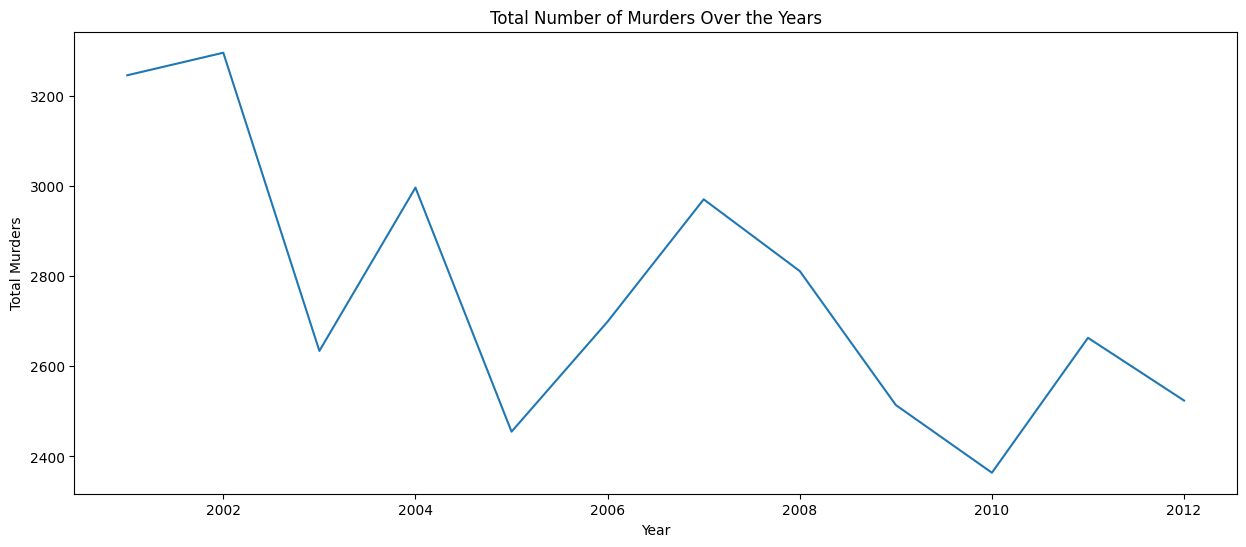

In [57]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Year', y='Total_Murders', data=new_df, estimator='sum', ci=None)
plt.title('Total Number of Murders Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Murders')
plt.show()

**Insighst from above chart** The line plot illustrates the timeline of total murder counts across different years.
- The peak in 2002 stands out, recording the highest count of 3295 murders, closely followed by 2001 with 3245.
- Subsequent years, including 2004 (2996), 2007 (2970), and 2008 (2811), also exhibit notable murder counts.
- Conversely, 2010 marks the year with the lowest total murders, recording 2364 incidents.
- The early 2000s show a trend of elevated murder counts, indicating periods of heightened criminal incidents.

### Chart 2

## Top 10 districts with the highest average number of murders

District
PATNA                382.166667
MUZAFFARNAGAR        261.400000
MUMBAI               250.800000
24 PARGANAS SOUTH    236.666667
BANGALORE COMMR.     235.916667
RANCHI               232.200000
MUMBAI COMMR.        220.285714
CYBERABAD            194.285714
24 PARGANAS NORTH    190.125000
AHMEDABAD COMMR.     134.666667
Name: Total_Murders, dtype: float64


<ipython-input-58-2500f98a8934>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_districts.index, y=top_districts.values, palette='viridis')


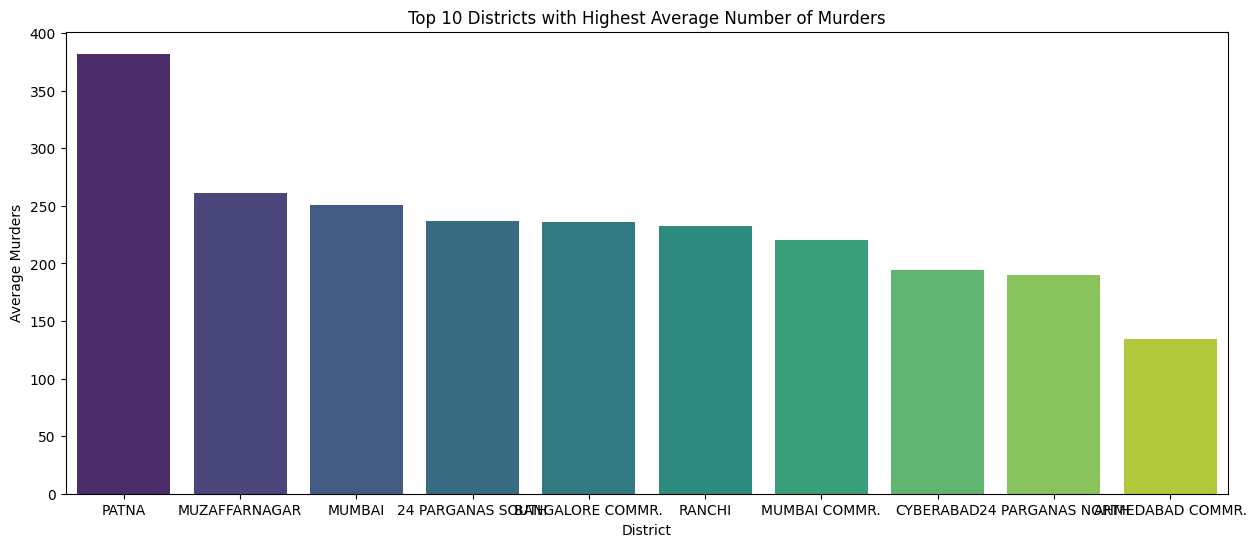

In [58]:
top_districts = new_df.groupby('District')['Total_Murders'].mean().sort_values(ascending=False).head(10)

print(top_districts)

plt.figure(figsize=(15, 6))
sns.barplot(x=top_districts.index, y=top_districts.values, palette='viridis')
plt.title('Top 10 Districts with Highest Average Number of Murders')
plt.xlabel('District')
plt.ylabel('Average Murders')
plt.show()

**Insights from above chart,**

* District-wise Averages:
    
    **Patna:** Leads with an average of approximately 382.17 murders per year.
    
    **Muzaffarnagar:** Follows closely with an average of around 261.4 murders annually.
    
    **Mumbai:** Records an average of approximately 250.8 murders per year.
    
    **24 Parganas South:** Has an average of about 236.67 murders per year.
    
    **Bangalore Commr.:** Reports an average of around 235.92 murders annually.
    
    **Ranchi:** Shows an average of about 232.2 murders per year.
    
    **Mumbai Commr.:** Records an average of approximately 220.29 murders per year.
    
    **Cyberabad:** Presents an average of around 194.29 murders annually.
    
    **24 Parganas North:** Indicates an average of about 190.13 murders per year.
    
    **Ahmedabad Commr.:** Shows an average of approximately 134.67 murders per year.

* **Patna stands out as the district with the highest average murders, followed by Muzaffarnagar and Mumbai.**

The chart highlights districts that consistently experience higher average murder rates, suggesting potential areas of concern for law enforcement and policymakers.

### Chart 3

## Year wise MurderCases vs State_UT

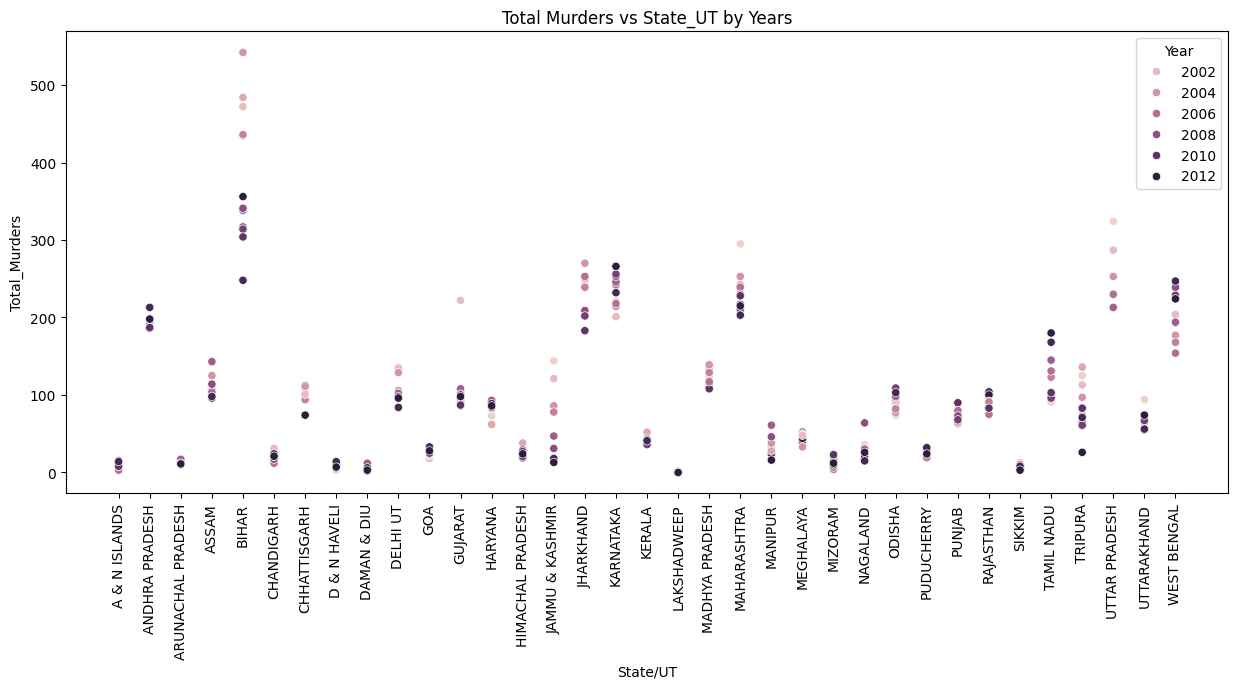

In [64]:
plt.figure(figsize = (15,6))
sns.scatterplot(x = new_df['State/UT'], y = new_df['Total_Murders'], hue = new_df['Year'])
plt.title('Total Murders vs State_UT by Years')
plt.xticks(rotation = 90)
plt.show()

**Insighsts from above chart,**
- States like Uttar Pradesh and Bihar tend to have higher murder counts compared to others.Uttar Pradesh exhibits fluctuating murder counts, suggesting variations in crime rates over different years.
- Maharashtra displays varying murder counts over the specified years, indicating changes in crime rates within the state.
-Jharkhand experiences fluctuations in murder counts, suggesting a dynamic situation in terms of crime rates.Karnataka shows varying murder counts across the years, reflecting changes in crime dynamics within the state.

- Over the years, there are fluctuations in murder counts for various states, indicating that some areas may experience changes in crime rates.